In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
import pickle
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

In [5]:
base_dir = "drive/MyDrive/IST707/Project/"
models_dir = base_dir + "Models/"
test_dir = base_dir + "Test/"

In [108]:
import json
with open(base_dir + 'index_labels.json', 'r') as f:
    data_dict = json.load(f)

# myClasses = [{"id":int(key), "name":value} for key, value in data_dict.items()]

In [133]:
images = [
    "asl-0.jpg",
    "asl-7.jpg",
    "asl-a.jpg",
    "asl-i.jpg",
    "asl-l.jpg",
    "asl-t.jpg",
    "asl-s.jpg",
    "asl-s-2.jpg",
    "asl-y.jpg",
    "asl-y-2.jpg"
    ]

noSign = [f'n{i+1}.jpg' for i in range(6)]
allImgs = noSign + images

# IsSign Test

In [172]:
# signModel = models_dir + "decision_tree_model_isSign.pkl"
signModel = models_dir + "mlp_model_isSign.pkl"

In [173]:
with open(signModel, 'rb') as f:
    signModel = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [174]:
import cv2
def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image,(32,32))
    image = image/255.0
    return image

In [175]:
images = []
for i in allImgs:
    print(i)
    image = cv2.imread(test_dir + i)
    image = preprocess(image)
    images.append(image.reshape(-1))

n1.jpg
n2.jpg
n3.jpg
n4.jpg
n5.jpg
n6.jpg
asl-0.jpg
asl-7.jpg
asl-a.jpg
asl-i.jpg
asl-l.jpg
asl-t.jpg
asl-s.jpg
asl-s-2.jpg
asl-y.jpg
asl-y-2.jpg


In [176]:
y_pred = signModel.predict(images)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [177]:
print('Predicted class labels:', y_pred)

Predicted class labels: [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


# CNN

In [124]:
img_model = tf.keras.models.load_model(models_dir + 'cnn_3conv_e20_v2.h5')

In [127]:
image_path = test_dir + images[-2]
image = Image.open(image_path)
image = image.resize((32, 32)).convert('L')
image_array = np.array(image)
image_array = image_array.reshape((1, 32, 32, 1))
image_array = image_array / 255.0
prediction = img_model.predict(image_array)
predicted_class = np.argmax(prediction, axis=1)[0]
out = data_dict[str(predicted_class)]
print(images[-2].replace("asl-","").replace(".jpg","")," - ",out)

1/1 [==============================] - 0s 30ms/step
y  -  y


# Inception & Resnet

In [115]:
# model = load_model(models_dir + 'resnet50v2_imagenet_1_V1.h5')
# model = load_model(models_dir + 'inception_imagenet_1_V2.h5')
model = load_model(models_dir + 'InceptionResNetV2_1_v1.h5')

In [119]:
results = []
for im in images:
    image = Image.open(test_dir + im)
    image = image.resize((128, 128))
    x = np.array(image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make predictions
    preds = model.predict(x)
    out = data_dict[str(np.argmax(preds[0]))]
    results.append(out)
    print(im.replace("asl-","").replace(".jpg","")," - ",out)

1/1 [==============================] - 0s 226ms/step
0  -  0
1/1 [==============================] - 0s 173ms/step
7  -  7
1/1 [==============================] - 0s 188ms/step
a  -  a
1/1 [==============================] - 0s 180ms/step
i  -  j
1/1 [==============================] - 0s 176ms/step
l  -  l
1/1 [==============================] - 0s 177ms/step
t  -  t
1/1 [==============================] - 0s 174ms/step
s  -  s
1/1 [==============================] - 0s 168ms/step
s-2  -  s
1/1 [==============================] - 0s 155ms/step
y  -  y
1/1 [==============================] - 0s 158ms/step
y-2  -  y


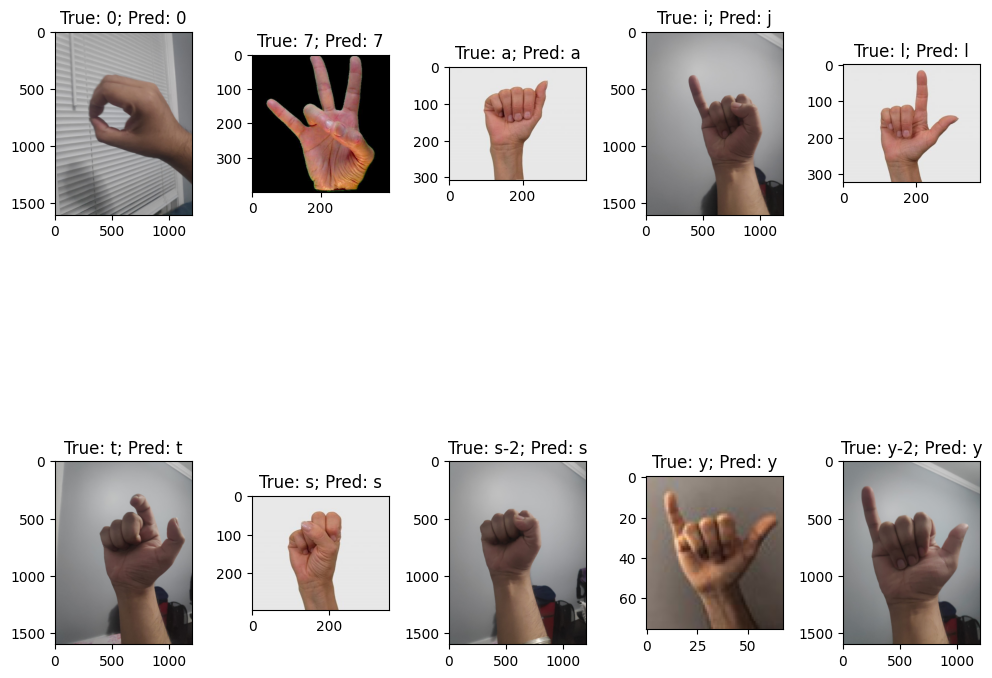

In [123]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

num_rows = 2
num_cols = 5

fig = plt.figure(figsize=(10, 10))

for i, im in enumerate(images):
    img = mpimg.imread(test_dir + im)
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    ax.imshow(img)
    true = im.replace("asl-","").replace(".jpg","")
    if '-' in true:
        true = true.split()[0]
    ax.set_title(f'True: {true}; Pred: {results[i]}')
fig.tight_layout()
plt.show()